##Car Price Prediction
________
By Ahmed Ali

#Environment set-up

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

##Data Wrangling

In [2]:
df = pd.read_csv('/content/car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


##Data Cleaning
In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions.

In [6]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [16]:
for i in df.columns:
  print(i,':',df[i].nunique())

Car_Name : 98
Year : 16
Selling_Price : 156
Present_Price : 147
Kms_Driven : 206
Fuel_Type : 3
Seller_Type : 2
Transmission : 2
Owner : 3


In [22]:
df_objects = df[['Fuel_Type','Seller_Type','Transmission']]
for i in df_objects:
  print(i,':',df[i].value_counts())

Fuel_Type : Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Seller_Type : Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission : Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [23]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.head(5)

<ipython-input-23-57191b4f539c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-23-57191b4f539c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-23-57191b4f539c>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [24]:
df=df.drop(['Car_Name'],axis=1)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

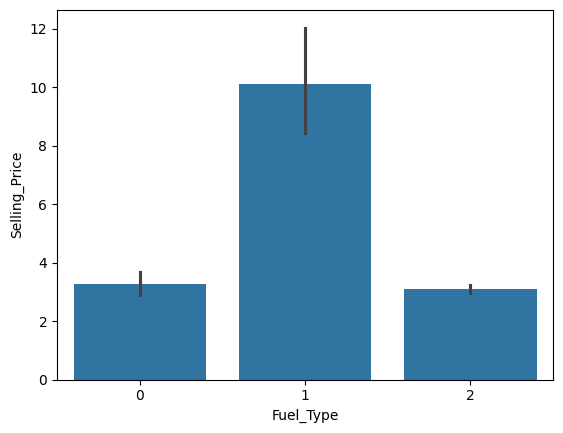

In [28]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)
#diesel car is the most expensive car

<Axes: xlabel='Year', ylabel='Selling_Price'>

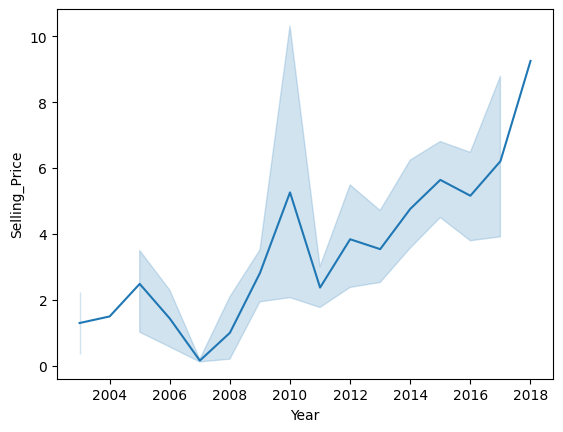

In [31]:
sns.lineplot(x='Year',y='Selling_Price',data=df)

<Axes: xlabel='Fuel_Type', ylabel='count'>

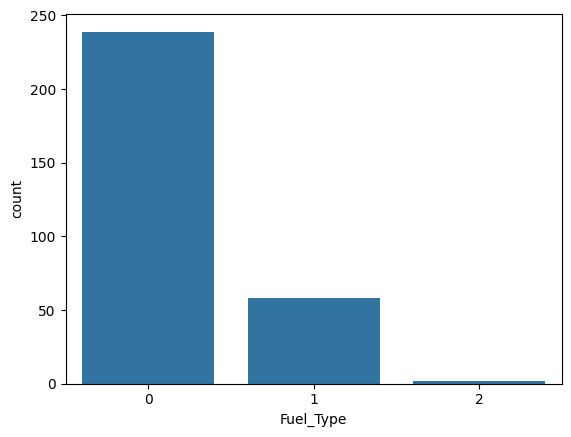

In [32]:
sns.countplot(x='Fuel_Type',data=df)


<Axes: xlabel='Kms_Driven'>

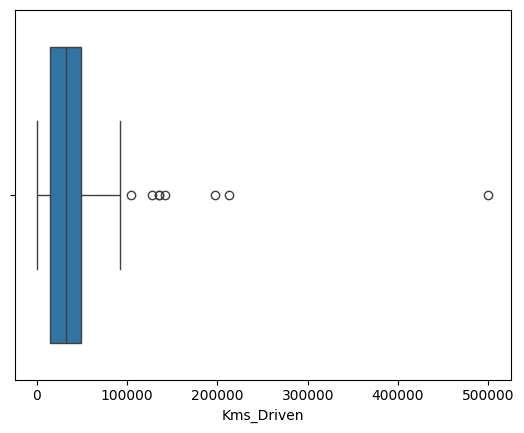

In [36]:
sns.boxplot(x='Kms_Driven',data=df)

In [57]:
df_kms = df[df['Kms_Driven']> 100000]
df_kms


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,0,1,0,0
50,2012,14.90,30.61,104707,1,0,1,0
53,2013,16.00,30.61,135000,1,1,1,0
77,2004,1.50,12.35,135154,0,0,1,0
84,2005,3.49,13.46,197176,1,0,0,0
85,2006,2.50,23.73,142000,0,1,1,3
179,2010,0.31,1.05,213000,0,1,0,0
196,2008,0.17,0.52,500000,0,1,1,0


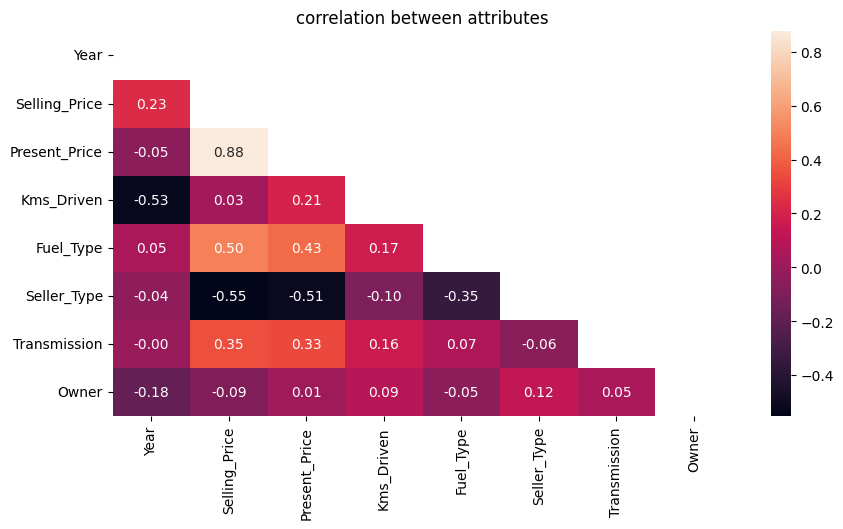

In [58]:

# plotting correlation heatmap
plt.figure(figsize=(10,5))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()


##Modeling

In [56]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [63]:
model = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=33)

In [64]:
training_data_prediction = model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9863385621522684


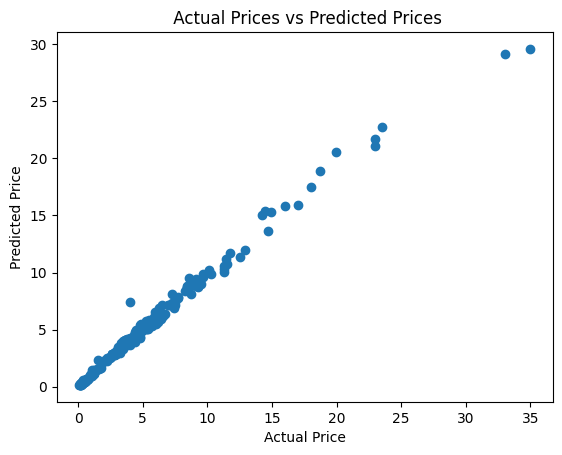

In [65]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [68]:
test_data_prediction = model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9396713531265706


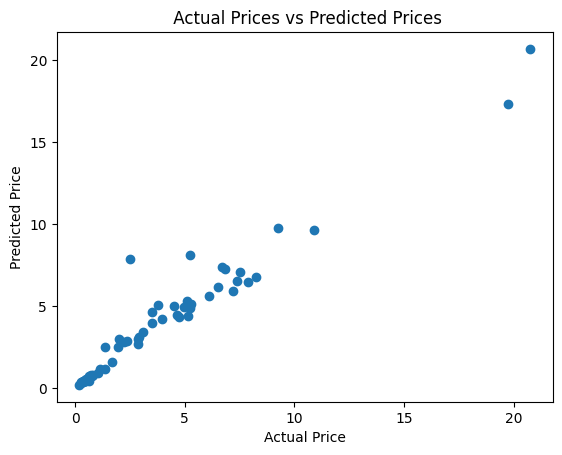

In [69]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()
